In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
#pip install openpyxl

In [6]:
df = pd.read_csv('deaths-and-new-cases-of-hiv.csv').dropna()
df

,Entity,Code,Year,Deaths,Incidence,Prevalence
0,Afghanistan,AFG,1990,34.301940,87.665597,41.836452
1,Afghanistan,AFG,1991,40.843838,103.773594,49.474703
2,Afghanistan,AFG,1992,48.379297,119.933403,60.943042
3,Afghanistan,AFG,1993,55.828985,127.263300,70.702704
4,Afghanistan,AFG,1994,63.353204,133.063077,77.101398
...,...,...,...,...,...,...
8215,Zimbabwe,ZWE,2015,29161.730990,47924.896260,124519.015700
8216,Zimbabwe,ZWE,2016,27140.790940,43866.802730,124293.836100
8217,Zimbabwe,ZWE,2017,24846.237930,39254.800620,123927.188400
8218,Zimbabwe,ZWE,2018,22106.464440,34072.929290,123415.570000


In [7]:
df.describe()

,Year,Deaths,Incidence,Prevalence
count,6090.000000,6.090000e+03,6.090000e+03,6.090000e+03
mean,2004.500000,1.194697e+04,2.556933e+04,2.548663e+04
std,8.656152,9.200654e+04,1.889382e+05,1.940550e+05
min,1990.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1997.000000,1.084786e+01,3.579925e+01,2.897701e+01
50%,2004.500000,1.438461e+02,5.103016e+02,3.975680e+02
75%,2012.000000,1.994986e+03,4.814531e+03,5.204943e+03
max,2019.000000,1.844490e+06,3.310627e+06,3.684815e+06


In [8]:
m = df[df.Incidence == 0].reset_index()
m

,index,Entity,Code,Year,Deaths,Incidence,Prevalence
0,630,Bangladesh,BGD,1990,0.000000,0.0,0.000000
1,631,Bangladesh,BGD,1991,0.000000,0.0,7.212680
2,632,Bangladesh,BGD,1992,0.000000,0.0,16.067854
3,633,Bangladesh,BGD,1993,0.000000,0.0,26.473074
4,5670,Philippines,PHL,1990,764.581884,0.0,0.000000


In [9]:
Incidence_zero = m.Incidence[m.Incidence == 0].count()
print('Incidence_zero = {}'.format(Incidence_zero))
print('{:.2f} %'.format(Incidence_zero / df.shape[0] * 100))

Incidence_zero = 5
0.08 %


In [12]:
#ในกรณีที่พบ 0 ไม่มาก คือไม่กี่ % ไม่ต้องตัดออกให้ใช้วิธีเติมค่าเฉลี่ย
df['Deaths'] = df.Deaths.replace(0, df.Deaths.mean())
df['Incidence'] = df.Incidence.replace(0, df.Incidence.mean())
df['Prevalence'] = df.Prevalence.replace(0, df.Prevalence.mean())

In [13]:
# 10 Countries in AEC
mt = df.loc[df['Entity'].isin(['Singapore','Indonesia','Thailand','Myanmar','Vietnam','Brunei','Laos','Cambodia','Malaysia','Philippines'])] 
mt

,Entity,Code,Year,Deaths,Incidence,Prevalence
990,Brunei,BRN,1990,0.729890,4.843064,3.257315
991,Brunei,BRN,1991,0.875647,5.538673,3.698885
992,Brunei,BRN,1992,1.045025,6.372487,4.195644
993,Brunei,BRN,1993,1.187360,7.149029,4.756514
994,Brunei,BRN,1994,1.357555,7.622272,5.359148
...,...,...,...,...,...,...
7765,Vietnam,VNM,2015,7270.637102,17313.256240,21394.880990
7766,Vietnam,VNM,2016,7048.998670,15078.112250,22271.098810
7767,Vietnam,VNM,2017,6761.183416,15199.702700,23074.280730
7768,Vietnam,VNM,2018,6499.236614,15265.534840,23905.587890


In [14]:
mt.describe()

,Year,Deaths,Incidence,Prevalence
count,270.000000,270.000000,270.000000,270.000000
mean,2004.500000,5120.693183,11602.118846,12393.982158
std,8.671515,7219.441293,14135.419019,13704.145264
min,1990.000000,0.027364,4.843064,0.366472
25%,1997.000000,391.051981,1474.234629,931.392534
50%,2004.500000,2274.829031,5918.540091,7505.252001
75%,2012.000000,6400.294337,16411.382475,20826.936575
max,2019.000000,35797.773400,84443.491460,52717.189650


In [15]:
mt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 990 to 7769
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Entity      270 non-null    object 
 1   Code        270 non-null    object 
 2   Year        270 non-null    int64  
 3   Deaths      270 non-null    float64
 4   Incidence   270 non-null    float64
 5   Prevalence  270 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 14.8+ KB


In [16]:
mt['Entity'].unique()

array(['Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar',
       'Philippines', 'Thailand', 'Vietnam'], dtype=object)

In [27]:
# #การแปลงข้อมูล class คอลัมน์ location ให้เป็นตัวเลข
# from sklearn.preprocessing import LabelEncoder
# y_le = LabelEncoder()
# y = y_le.fit_transform(dt['class'])
# dt['class_'] = y 
# y.reshape(-1,1)

In [23]:
X = mt.iloc[:, 3:6] #.values 
y = mt.iloc[:, 0] #.values 

In [26]:
X

,Deaths,Incidence,Prevalence
990,0.729890,4.843064,3.257315
991,0.875647,5.538673,3.698885
992,1.045025,6.372487,4.195644
993,1.187360,7.149029,4.756514
994,1.357555,7.622272,5.359148
...,...,...,...
7765,7270.637102,17313.256240,21394.880990
7766,7048.998670,15078.112250,22271.098810
7767,6761.183416,15199.702700,23074.280730
7768,6499.236614,15265.534840,23905.587890


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=48)

In [44]:
X_train

,Deaths,Incidence,Prevalence
5694,5240.956786,29655.144270,15102.601970
5688,5612.721162,13110.733000,7608.324161
3922,453.542476,628.472261,914.099012
4855,9950.095658,11685.919390,20665.949060
3488,851.366340,2934.007971,16232.496920
...,...,...,...
4837,4434.598499,22675.834170,11484.164950
7136,20542.820650,25093.360980,50899.112990
5698,5292.491380,49215.827580,25246.305480
1131,2874.528067,2144.858213,7900.512626


In [50]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_predict.reshape(-1,1)


array([['Laos'],
       ['Myanmar'],
       ['Philippines'],
       ['Myanmar'],
       ['Malaysia'],
       ['Indonesia'],
       ['Brunei'],
       ['Malaysia'],
       ['Brunei'],
       ['Malaysia'],
       ['Thailand'],
       ['Thailand'],
       ['Indonesia'],
       ['Laos'],
       ['Indonesia'],
       ['Myanmar'],
       ['Brunei'],
       ['Indonesia'],
       ['Philippines'],
       ['Philippines'],
       ['Brunei'],
       ['Indonesia'],
       ['Indonesia'],
       ['Philippines'],
       ['Malaysia'],
       ['Brunei'],
       ['Cambodia'],
       ['Cambodia'],
       ['Myanmar'],
       ['Vietnam'],
       ['Vietnam'],
       ['Laos'],
       ['Laos'],
       ['Indonesia'],
       ['Philippines'],
       ['Malaysia'],
       ['Cambodia'],
       ['Thailand'],
       ['Thailand'],
       ['Brunei'],
       ['Myanmar'],
       ['Malaysia'],
       ['Malaysia'],
       ['Laos'],
       ['Brunei'],
       ['Myanmar'],
       ['Malaysia'],
       ['Indonesia'],
       ['Br

In [51]:
#การป้อนข้อมูลพยากรณ์
pred1 = [[0.729890,4.843064,3.257315],
         [6399.438121,15076.979400,24748.392520]]
         
dn = model.predict(pred1)

i = 1
for m in range(len(dn)):
    print('%d' %i, dn[m])
    i += 1

1 Brunei
2 Vietnam


C:\Users\Techatach\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [52]:
ypred = pd.DataFrame(y_predict)
data = ypred.rename(columns={0:'ข้อมูลพยากรณ์'})
data 

,ข้อมูลพยากรณ์
0,Laos
1,Myanmar
2,Philippines
3,Myanmar
4,Malaysia
...,...
76,Vietnam
77,Philippines
78,Myanmar
79,Brunei


In [53]:
ytest = pd.DataFrame(y_test).reset_index()
data2 = ytest.rename(columns={'Entity':'ข้อมูลจริง'})
dt = data2.drop(['index'], axis=1) #ลบคอลัมน์ index
dt

,ข้อมูลจริง
0,Laos
1,Philippines
2,Vietnam
3,Myanmar
4,Malaysia
...,...
76,Vietnam
77,Vietnam
78,Myanmar
79,Brunei


In [54]:
#ตารางเปรียบเทียบข้อมูลจริงและการพยากรณ์
#total.to_csv('data.csv')
#total.to_excel('data.xlsx')

total = pd.concat([dt,data],axis=1) #.round(0)
total

,ข้อมูลจริง,ข้อมูลพยากรณ์
0,Laos,Laos
1,Philippines,Myanmar
2,Vietnam,Philippines
3,Myanmar,Myanmar
4,Malaysia,Malaysia
...,...,...
76,Vietnam,Vietnam
77,Vietnam,Philippines
78,Myanmar,Myanmar
79,Brunei,Brunei


In [55]:
Xtest = X_test.reset_index()
ds = Xtest.drop(['index'], axis=1) #ลบคอลัมน์ index
sum = pd.concat([ds, total],axis=1) #.round(0)
sum

,Deaths,Incidence,Prevalence,ข้อมูลจริง,ข้อมูลพยากรณ์
0,427.542906,667.648608,910.464633,Laos,Laos
1,5434.442745,37666.337930,19454.986870,Philippines,Myanmar
2,1786.842339,10026.962260,4654.402873,Vietnam,Philippines
3,15201.192640,21501.000250,23229.819150,Myanmar,Myanmar
4,2622.351949,3706.346802,4587.765130,Malaysia,Malaysia
...,...,...,...,...,...
76,7502.280075,17632.010490,19413.362570,Vietnam,Vietnam
77,1458.282593,7741.444861,3945.757345,Vietnam,Philippines
78,8294.403753,11092.063440,20848.412130,Myanmar,Myanmar
79,2.194201,20.409160,11.769051,Brunei,Brunei


#### การสร้างไดอะแกรม KNeighbors ประเมินความแม่นยำในการพยากรณ์

In [56]:
class_names = mt['Entity'].unique()
class_names

array(['Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar',
       'Philippines', 'Thailand', 'Vietnam'], dtype=object)

Accuracy Score: 0.80
              precision    recall  f1-score   support

      Brunei       0.67      1.00      0.80         8
    Cambodia       0.71      0.71      0.71         7
   Indonesia       0.86      0.92      0.89        13
        Laos       1.00      0.60      0.75        10
    Malaysia       0.90      0.90      0.90        10
     Myanmar       0.89      0.80      0.84        10
 Philippines       0.60      0.67      0.63         9
    Thailand       0.86      1.00      0.92         6
     Vietnam       0.83      0.62      0.71         8

    accuracy                           0.80        81
   macro avg       0.81      0.80      0.80        81
weighted avg       0.82      0.80      0.80        81

[[ 8  0  0  0  0  0  0  0  0]
 [ 0  5  1  0  0  0  1  0  0]
 [ 0  1 12  0  0  0  0  0  0]
 [ 4  0  0  6  0  0  0  0  0]
 [ 0  0  1  0  9  0  0  0  0]
 [ 0  1  0  0  1  8  0  0  0]
 [ 0  0  0  0  0  1  6  1  1]
 [ 0  0  0  0  0  0  0  6  0]
 [ 0  0  0  0  0  0  3  0  5]]


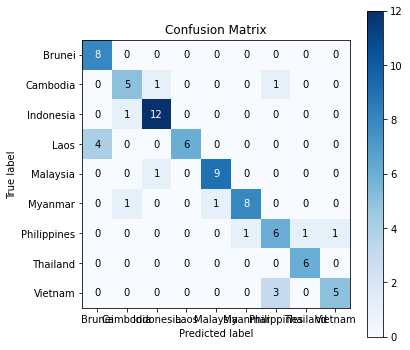

In [57]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_predict)))
#print('Accuracy Score:',accuracy_score(y_test, y_predict).round(2))
print(classification_report(y_test, y_predict, target_names=class_names))
cm = confusion_matrix(y_test, y_predict)
print(cm)

#pip install scikit-plot
import scikitplot as skplot
plt.rcParams['figure.figsize'] = 6,6 #10 x 10
skplot.metrics.plot_confusion_matrix(y_test, y_predict)
plt.show()

In [41]:
# from sklearn.model_selection import cross_val_score

# cvs = cross_val_score(model, X_test, y_predict, cv=10)
# print('cross_val_scores = {}'.format(cvs))
# print('mean = {:4f}'.format(cvs.mean()))